<a href="https://colab.research.google.com/github/sujataprasad01/ML-Price-Prediction-of-Used-Cars-Decision-Tree-/blob/main/Decision_Tree_Regression_(Price_Prediction_of_Used_Cars).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps

1. Import the libraries
2. Import the dataset
3. Perform data analysis
4. Splitting the data
5. [Optional] Data Preproccessing- Feature Scalling,...
6. Choosing a model- Decision Tree regressor
7. Training the model
8. Testing the model
9. Checking the performance of the mmodel

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Importing the dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv")

In [5]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# Data Analysis & EDA

In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [10]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [12]:
df.ndim

2

In [11]:
df.shape

(4340, 8)

In [13]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [14]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [15]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [16]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [17]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [18]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
# Create a column new_fuel and place it at index of the fuel column
# Replace the values:
# Petrol-0, Diesel-1, CNG-2, LPG-3, Electic-4

In [19]:
newdf=df.copy()

In [27]:
new_fuel=[]
for i in newdf.fuel.values:
    if i=='Petrol':
      new_fuel.append(0)
    elif i=='Diesel':
      new_fuel.append(1)
    elif i=='CNG':
      new_fuel.append(2)
    elif i=='LPG':
      new_fuel.append(3)
    else:
      new_fuel.append(4)

In [28]:
new_fuel

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,


In [40]:
newdf['new_fuel'] = new_fuel

In [41]:
newdf

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,new_fuel
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,1
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,1


In [43]:
newdf.drop('new_fuel', axis=1, inplace=True)

In [44]:
newdf.insert(4, 'new_fuel', new_fuel)

In [45]:
newdf

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Diesel,Individual,Manual,First Owner


In [46]:
newdf.new_fuel.unique()

array([0, 1, 2, 3, 4])

In [ ]:
# Create a column new_seller_type and place it at index of the seller_type column
# Replace the values:
# Individual-0, Dealer-1, Trustmark Dealer-2

In [47]:
newdf.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [55]:
newdf.drop('new_seller_type', axis=1, inplace=True)

In [57]:
x=newdf.seller_type.replace({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})
newdf.insert(newdf.columns.get_loc('seller_type'), 'new_seller_type', x)

In [58]:
newdf

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Diesel,0,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Diesel,0,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Petrol,0,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Diesel,0,Individual,Manual,First Owner


In [82]:
newdf2=newdf.copy()

In [60]:
newdf2.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [83]:
newdf2=newdf[['fuel', 'seller_type']]

In [72]:
newdf2

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual
...,...,...
4335,Diesel,Individual
4336,Diesel,Individual
4337,Petrol,Individual
4338,Diesel,Individual


In [73]:
type(newdf2)

pandas.core.frame.DataFrame

# Encoder

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
newdf2['fuel']=LabelEncoder().fit_transform(newdf2['fuel'])

<ipython-input-75-a995d81d2863>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2['fuel']=LabelEncoder().fit_transform(newdf2['fuel'])


In [76]:
newdf2['fuel'].unique()

array([4, 1, 0, 3, 2])

In [77]:
newdf2.head()

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual


from matplotlib import pyplot as plt
_df_0['fuel'].plot(kind='hist', bins=20, title='fuel')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['fuel'].plot(kind='line', figsize=(8, 4), title='fuel')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Pandas encoder

In [84]:
newdf2=pd.get_dummies(newdf2)

In [85]:
newdf2

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4335,0,1,0,0,0,0,1,0
4336,0,1,0,0,0,0,1,0
4337,0,0,0,0,1,0,1,0
4338,0,1,0,0,0,0,1,0


In [ ]:
# OneHotEncoder

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [86]:
enc=OneHotEncoder(handle_unknown='ignore')
enc.fit(newdf2)

OneHotEncoder(handle_unknown='ignore')

In [87]:
newdf2

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4335,0,1,0,0,0,0,1,0
4336,0,1,0,0,0,0,1,0
4337,0,0,0,0,1,0,1,0
4338,0,1,0,0,0,0,1,0


# New Section

In [88]:
newdf

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Diesel,0,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Diesel,0,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Petrol,0,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Diesel,0,Individual,Manual,First Owner


In [89]:
newdf['transmission']=LabelEncoder().fit_transform(newdf['transmission'])
newdf['owner']=LabelEncoder().fit_transform(newdf['owner'])

In [93]:
newdf.drop('fuel',  axis=1, inplace=True)

In [95]:
newdf.drop('seller_type',  axis=1, inplace=True)

In [96]:
newdf

,name,year,selling_price,km_driven,new_fuel,new_seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,1,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,0,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,0,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,0,0,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,0,1,0


In [97]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             4340 non-null   object
 1   year             4340 non-null   int64 
 2   selling_price    4340 non-null   int64 
 3   km_driven        4340 non-null   int64 
 4   new_fuel         4340 non-null   int64 
 5   new_seller_type  4340 non-null   int64 
 6   transmission     4340 non-null   int64 
 7   owner            4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


In [101]:
from datetime import date

In [108]:
date=date.today().year

In [109]:
date

2024

In [110]:
no_of_years=[]
for i in (newdf['year']):
  li=date-i
  no_of_years.append(li)

In [111]:
no_of_years

[17,
 17,
 12,
 7,
 10,
 17,
 8,
 10,
 9,
 7,
 9,
 10,
 6,
 17,
 17,
 12,
 7,
 10,
 17,
 8,
 10,
 9,
 7,
 9,
 10,
 6,
 9,
 5,
 11,
 10,
 11,
 6,
 13,
 6,
 6,
 11,
 12,
 13,
 8,
 9,
 5,
 14,
 10,
 11,
 15,
 12,
 10,
 10,
 10,
 12,
 15,
 15,
 5,
 18,
 7,
 6,
 6,
 6,
 8,
 10,
 12,
 28,
 10,
 11,
 19,
 10,
 10,
 15,
 15,
 14,
 13,
 7,
 6,
 17,
 15,
 10,
 18,
 7,
 6,
 17,
 14,
 10,
 19,
 10,
 9,
 5,
 8,
 9,
 7,
 7,
 9,
 11,
 17,
 11,
 10,
 9,
 11,
 7,
 11,
 11,
 15,
 6,
 7,
 6,
 16,
 12,
 7,
 14,
 7,
 6,
 5,
 7,
 12,
 14,
 13,
 7,
 8,
 10,
 8,
 10,
 17,
 10,
 11,
 20,
 6,
 17,
 12,
 12,
 8,
 8,
 8,
 14,
 12,
 9,
 9,
 7,
 9,
 26,
 12,
 9,
 13,
 21,
 8,
 19,
 11,
 9,
 6,
 9,
 8,
 22,
 6,
 17,
 16,
 12,
 9,
 12,
 8,
 10,
 4,
 9,
 13,
 10,
 11,
 14,
 11,
 7,
 13,
 13,
 8,
 9,
 12,
 13,
 11,
 18,
 5,
 17,
 4,
 20,
 11,
 8,
 9,
 6,
 6,
 15,
 15,
 6,
 5,
 21,
 8,
 7,
 19,
 11,
 17,
 12,
 14,
 13,
 15,
 15,
 18,
 7,
 12,
 12,
 9,
 10,
 7,
 11,
 10,
 6,
 11,
 10,
 8,
 6,
 7,
 5,
 8,
 9,
 7,
 12,
 11

In [115]:
newdf['no_of_years']=no_of_years

In [121]:
newdf.drop((2, 'no_of_years'), axis=1, inplace=True)

In [123]:
newdf.insert(2, 'no_of_years', no_of_years)

In [125]:
newdf.insert(2, 'Current_year', date)

In [126]:
newdf

,name,year,Current_year,no_of_years,selling_price,km_driven,new_fuel,new_seller_type,transmission,owner
0,Maruti 800 AC,2007,2024,17,60000,70000,0,0,1,0
1,Maruti Wagon R LXI Minor,2007,2024,17,135000,50000,0,0,1,0
2,Hyundai Verna 1.6 SX,2012,2024,12,600000,100000,1,0,1,0
3,Datsun RediGO T Option,2017,2024,7,250000,46000,0,0,1,0
4,Honda Amaze VX i-DTEC,2014,2024,10,450000,141000,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,2024,10,409999,80000,1,0,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,2024,10,409999,80000,1,0,1,2
4337,Maruti 800 AC BSIII,2009,2024,15,110000,83000,0,0,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,2024,8,865000,90000,1,0,1,0


In [129]:
newdf['selling_price'].rename('current_selling_price')

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: current_selling_price, Length: 4340, dtype: int64

In [132]:
newdf.rename(columns={'selling_price': 'current_selling_price'}, inplace=True)

In [133]:
newdf

,name,year,Current_year,no_of_years,current_selling_price,km_driven,new_fuel,new_seller_type,transmission,owner
0,Maruti 800 AC,2007,2024,17,60000,70000,0,0,1,0
1,Maruti Wagon R LXI Minor,2007,2024,17,135000,50000,0,0,1,0
2,Hyundai Verna 1.6 SX,2012,2024,12,600000,100000,1,0,1,0
3,Datsun RediGO T Option,2017,2024,7,250000,46000,0,0,1,0
4,Honda Amaze VX i-DTEC,2014,2024,10,450000,141000,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,2024,10,409999,80000,1,0,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,2024,10,409999,80000,1,0,1,2
4337,Maruti 800 AC BSIII,2009,2024,15,110000,83000,0,0,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,2024,8,865000,90000,1,0,1,0


In [135]:
newdf.drop(['name', 'year', 'Current_year'], axis=1, inplace=True)

In [136]:
newdf.head()

,no_of_years,current_selling_price,km_driven,new_fuel,new_seller_type,transmission,owner
0,17,60000,70000,0,0,1,0
1,17,135000,50000,0,0,1,0
2,12,600000,100000,1,0,1,0
3,7,250000,46000,0,0,1,0
4,10,450000,141000,1,0,1,2


In [137]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   no_of_years            4340 non-null   int64
 1   current_selling_price  4340 non-null   int64
 2   km_driven              4340 non-null   int64
 3   new_fuel               4340 non-null   int64
 4   new_seller_type        4340 non-null   int64
 5   transmission           4340 non-null   int64
 6   owner                  4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [138]:
newdf.corr()

,no_of_years,current_selling_price,km_driven,new_fuel,new_seller_type,transmission,owner
no_of_years,1.000000,-0.413922,0.419688,-0.090388,-0.182458,0.143800,0.414705
current_selling_price,-0.413922,1.000000,-0.192289,0.226883,0.240666,-0.530205,-0.207840
km_driven,0.419688,-0.192289,1.000000,0.274760,-0.187131,0.120226,0.297115
new_fuel,-0.090388,0.226883,0.274760,1.000000,0.011358,-0.027507,0.021907
new_seller_type,-0.182458,0.240666,-0.187131,0.011358,1.000000,-0.200191,-0.238281
transmission,0.143800,-0.530205,0.120226,-0.027507,-0.200191,1.000000,0.078893
owner,0.414705,-0.207840,0.297115,0.021907,-0.238281,0.078893,1.000000


<Axes: >

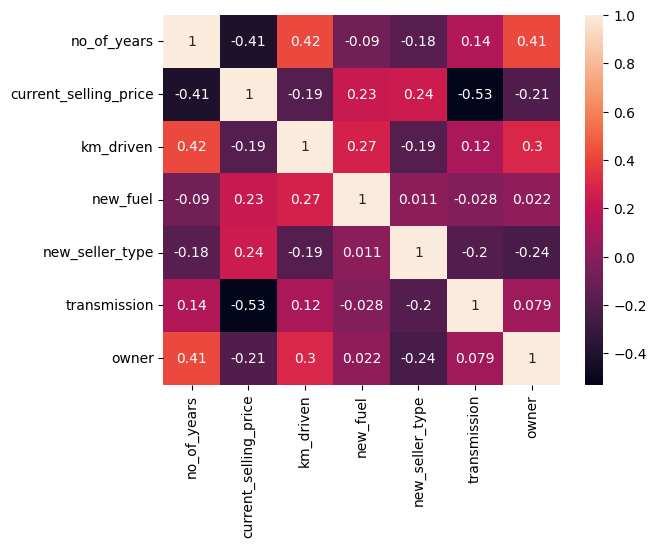

In [140]:
sns.heatmap(newdf.corr(), annot=True)

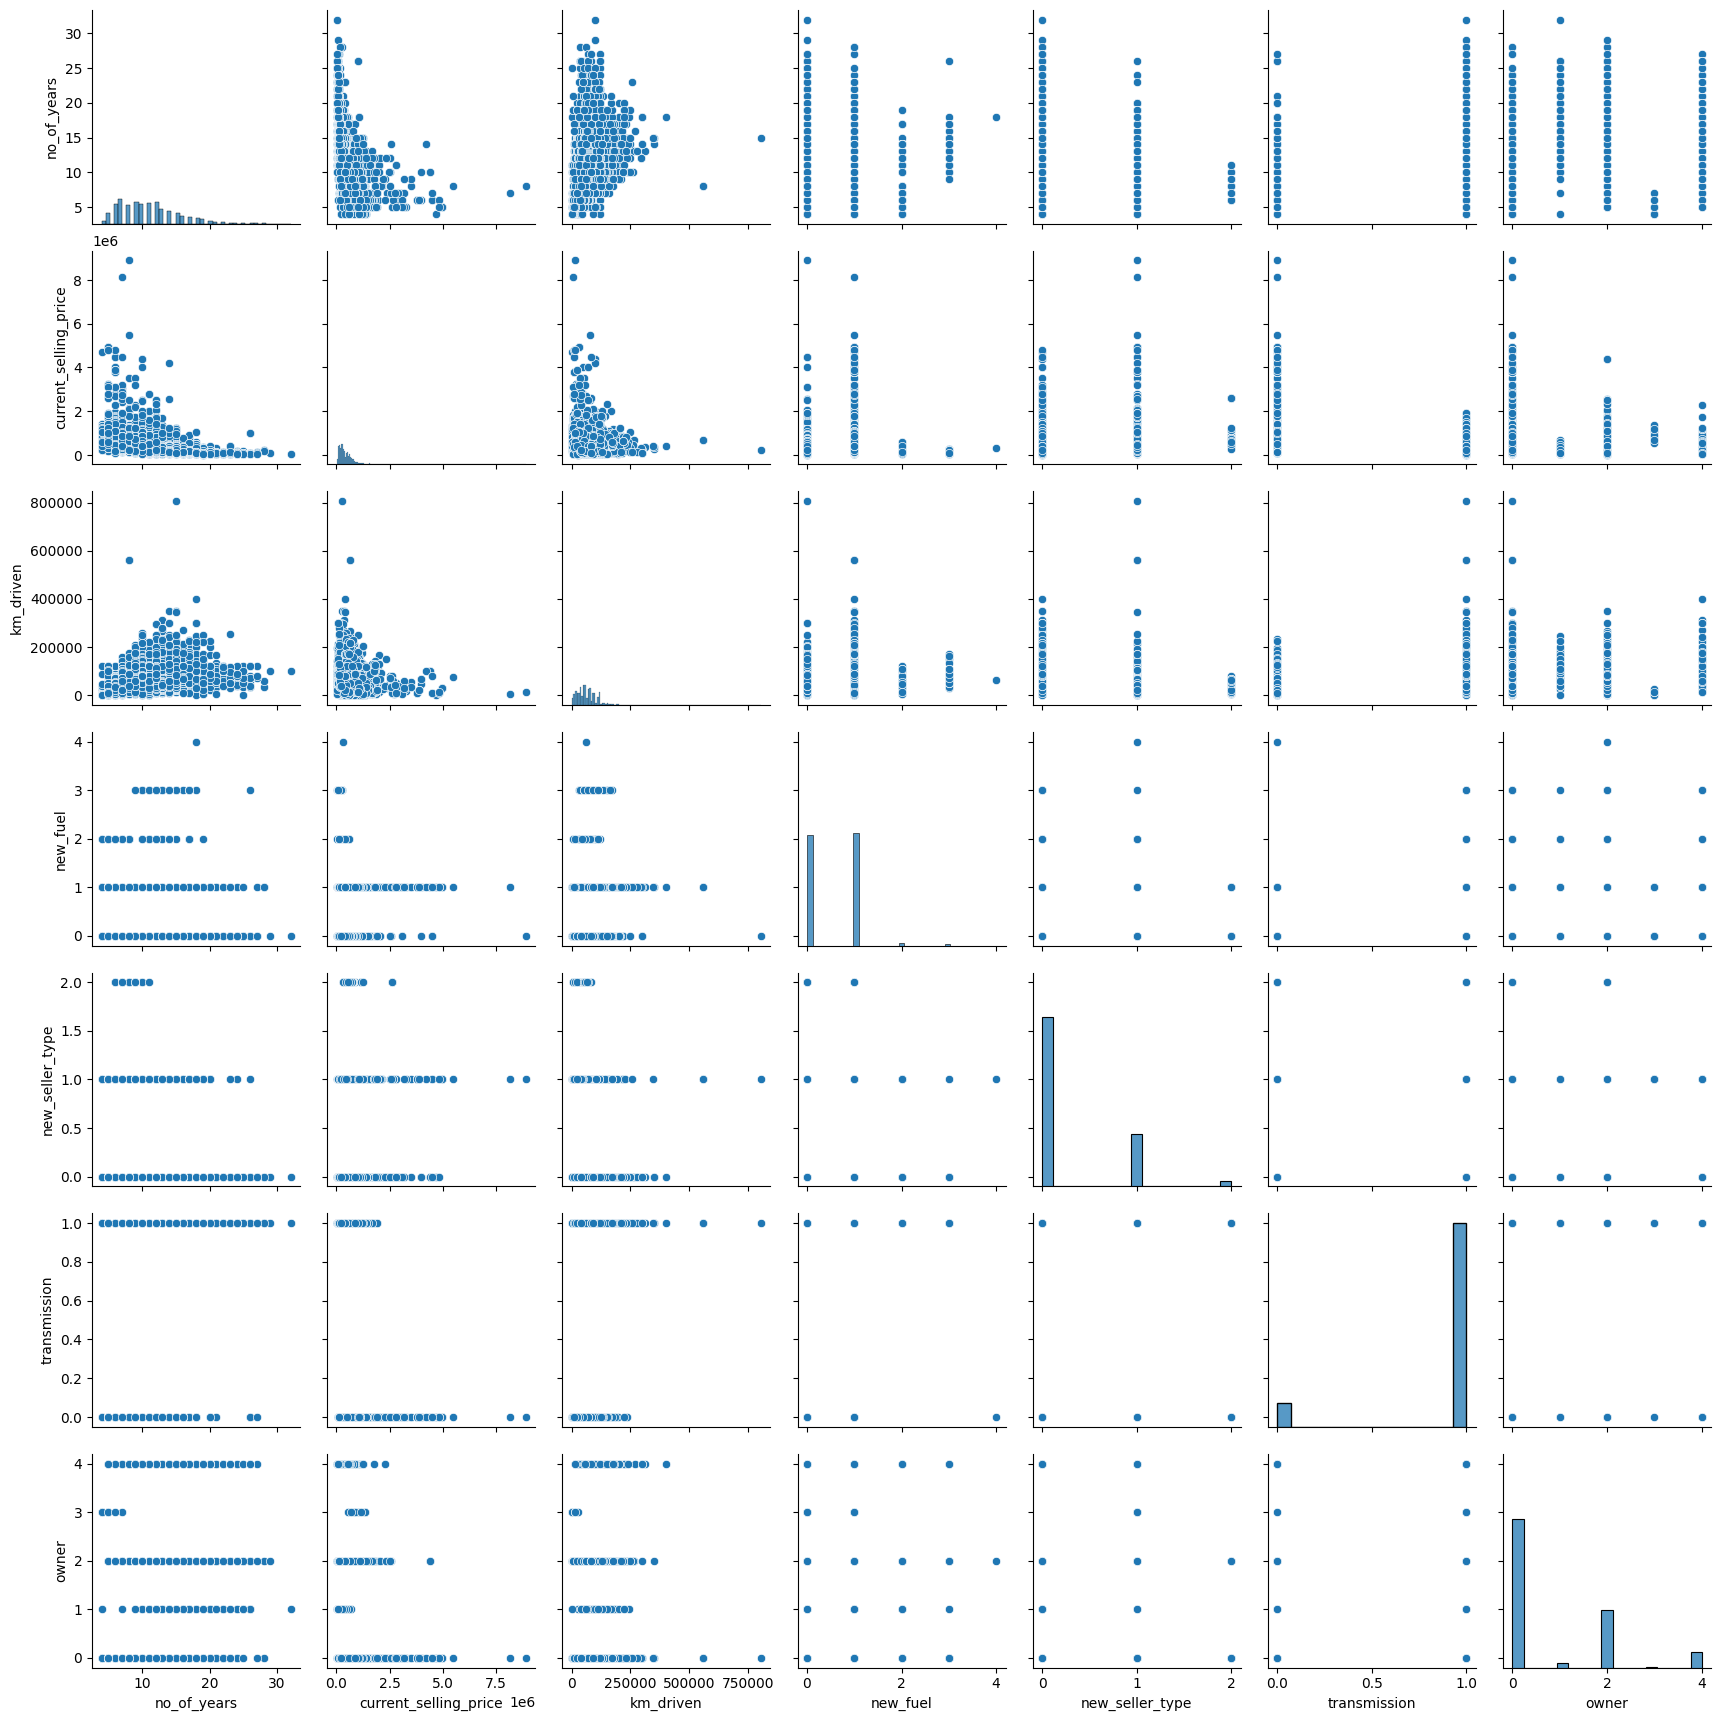

In [141]:
sns.pairplot(newdf)

<Axes: >

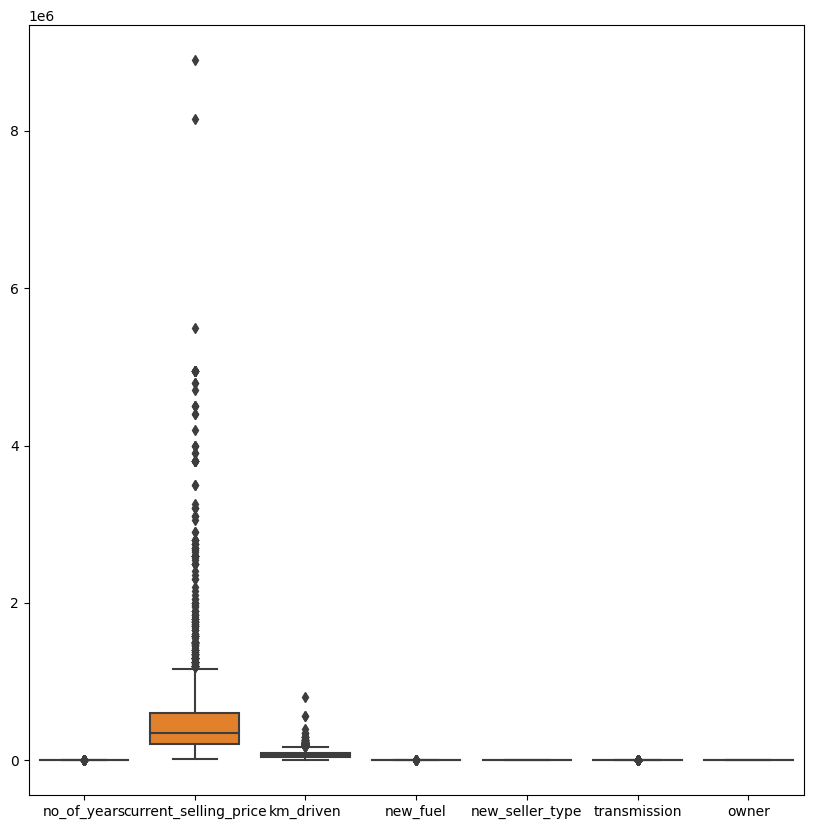

In [143]:
plt.figure(figsize=(10,10))
sns.boxplot(newdf)

<Axes: >

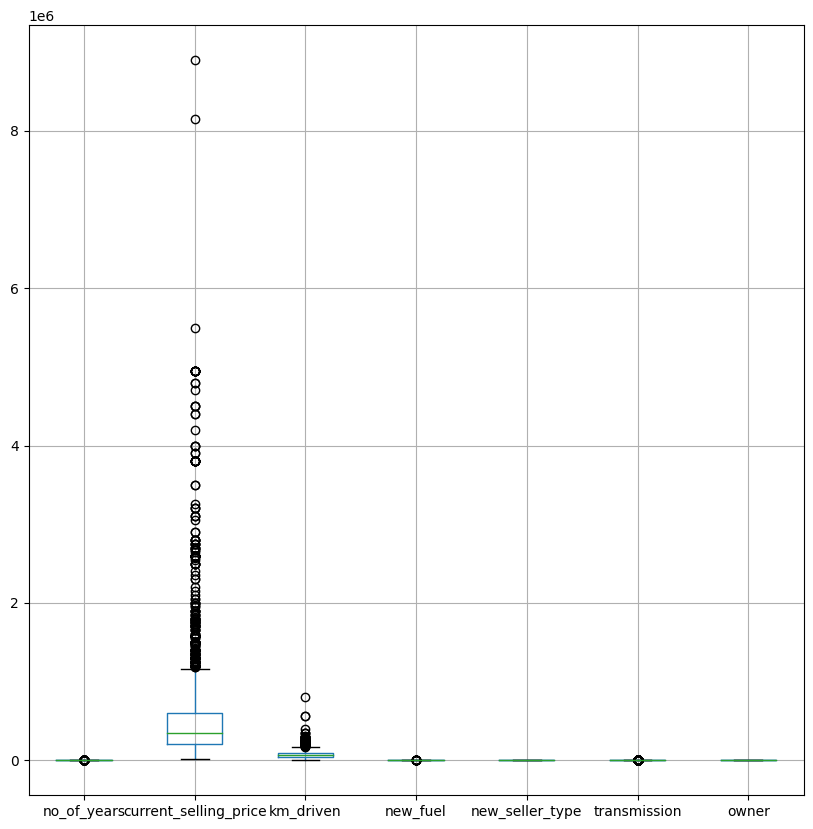

In [147]:
plt.figure(figsize=(10,10))
newdf.boxplot()

# Machine Learning

# Select the features and targets

In [148]:
X=np.array(newdf.drop('current_selling_price', axis=1))
Y=np.array(newdf['current_selling_price'])

In [149]:
X

array([[    17,  70000,      0,      0,      1,      0],
       [    17,  50000,      0,      0,      1,      0],
       [    12, 100000,      1,      0,      1,      0],
       ...,
       [    15,  83000,      0,      0,      1,      2],
       [     8,  90000,      1,      0,      1,      0],
       [     8,  40000,      0,      0,      1,      0]])

In [150]:
Y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000])

# splitting the data

In [151]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)

In [152]:
X_train

array([[    13, 130000,      1,      0,      1,      2],
       [    12, 129000,      1,      0,      1,      0],
       [    11,  71000,      2,      0,      1,      2],
       ...,
       [    14,  90000,      1,      0,      1,      2],
       [    13,  40000,      1,      0,      1,      2],
       [     9,  49000,      0,      0,      1,      0]])

In [153]:
X_test

array([[     7,  30000,      0,      1,      1,      0],
       [    10,  54000,      0,      1,      1,      2],
       [     6,  70000,      1,      0,      1,      2],
       ...,
       [    16, 110000,      0,      0,      1,      2],
       [    17,  58000,      0,      1,      1,      2],
       [     8, 100000,      1,      0,      1,      0]])

In [154]:
Y_train

array([290000, 225000, 250000, ..., 350000, 150000, 550000])

In [155]:
Y_test

array([ 260000,  525000,  950000,  290000,  390000,  150000,  535000,
        575000,  225000,  200000,  800000,  300000,  160000,   61000,
        300000,  100000,  400000,  300000,  465000,  350000,  300000,
        145000,  500000,  400000,  550000,  155000,  690000,  260000,
        300000,  249000,  400000,  130000,  711000,  229999,  450000,
        250999,  350000,   80000,  360000,  852000,  229999,  120000,
        375000,   85000,  894999,   65000,  375000,  850000,  250000,
        900000,  509000,  300000,  900000,  180000,   75000,  844999,
         95000,  421000,  335000, 1150000,  100000,   89999,  350000,
        620000,  245000,  450000,  711000,  105000,   55000, 1085000,
        229999,  400000,  425000,   90000,   80000, 2595000,  350000,
        380000,  450000,  800000,  100000,  750000, 1549000,  850000,
        140000,  125000,  155000,  850000,  120000,  215000,  275000,
        120000,  625000,  425000, 1300000,  330000,  650000,  170000,
         85000,  270

# Choosing the model

In [156]:
regressor=DecisionTreeRegressor()

# Train the model

In [158]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

# Testing the model

In [160]:
Y_pred=regressor.predict(X_test)

In [161]:
Y_pred

array([ 575000.        ,  525000.        ,  450000.        ,
        800000.        ,  465000.        ,  340000.        ,
        502499.75      ,  575000.        ,  300000.        ,
        229999.        , 1250000.        ,  338000.        ,
        224000.        ,   61000.        ,  218888.88888889,
         93000.        ,  502166.66666667,  300000.        ,
       1850000.        ,  350000.        ,  261666.66666667,
        145000.        ,  744999.91666667,  408750.        ,
        542800.        ,  700000.        ,  690000.        ,
        260000.        ,  320000.        ,  235000.        ,
        255000.        ,  108750.        ,  711000.        ,
        229999.        ,  242500.        ,  306999.8       ,
       1025000.        ,  130000.        ,  567142.71428571,
        986999.66666667,  229999.        ,  135000.        ,
        399285.71428571,  224000.        ,  330000.        ,
         93333.33333333,  259444.44444444,  690000.        ,
        550000.        ,

In [162]:
target=pd.DataFrame({"Actual": Y_test, "Predicted": Y_pred})

In [163]:
target

,Actual,Predicted
0,260000,575000.0
1,525000,525000.0
2,950000,450000.0
3,290000,800000.0
4,390000,465000.0
...,...,...
863,390000,575000.0
864,295000,295000.0
865,110000,140000.0
866,80000,100000.0


Text(0, 0.5, 'Y_pred')

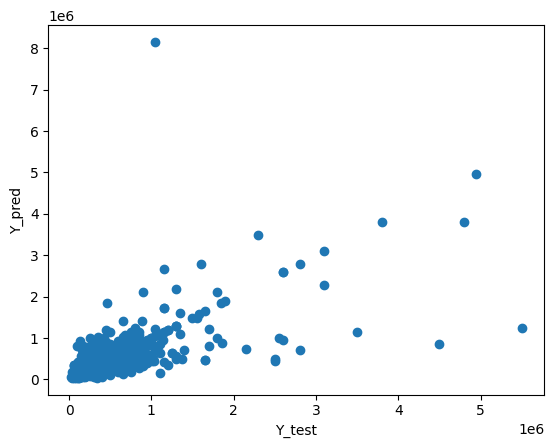

In [165]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

# New Section

ValueError: ignored

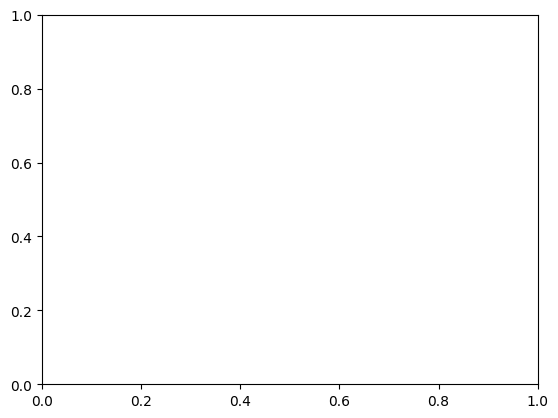

In [172]:
plt.scatter(X_test.reshape(-1), Y_test, color='yellow')
plt.scatter(X_test.reshape(-1), Y_pred.reshape(-1), color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: >

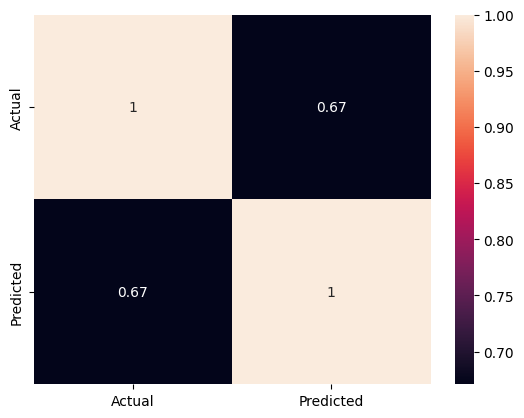

In [177]:
sns.heatmap(target.corr(), annot=True)

# Performance

In [173]:
r2_score(Y_test, Y_pred)

0.36098549900578847

In [174]:
mean_squared_error(Y_test, Y_pred)

183326056912.2975

In [175]:
mean_absolute_error(Y_test, Y_pred)

177278.41589998905